In [59]:
import pandas as pd
import numpy as np

In [95]:


activities = pd.read_csv("C:/Users/anhin/Documents/GitHub/MoonKEY/data/activitats.csv", encoding='ISO-8859-1')
marks = pd.read_csv("C:/Users/anhin/Documents/GitHub/MoonKEY/data/notes.csv", delimiter=';')
submision = pd.read_csv("C:/Users/anhin/Documents/GitHub/MoonKEY/data/trameses.csv")



In [14]:
user_31 = submision[(submision["userid"] == 31) & (submision["activitat_id"] == 362)]
user_31 = user_31.fillna(-1)
user_31 = user_31.sort_values(by=['datesubmitted']).copy()
user_31['attempt_number'] = user_31.groupby('userid').cumcount() + 1
user_31 = user_31[(user_31["grade"] == user_31["grade"].max()) & (user_31["dategraded"] == user_31["dategraded"].min())]



In [16]:
# Filtrar por usuario y actividad específica
user_31 = submision[(submision["userid"] == 31) & (submision["activitat_id"] == 362)]

# Llenar valores NaN con -1
user_31 = user_31.fillna(-1)

# Ordenar por fecha de entrega
user_31 = user_31.sort_values(by=['datesubmitted']).copy()

# Añadir el número de intento
user_31['attempt_number'] = user_31.groupby('userid').cumcount() + 1

# Obtener la nota máxima primero, luego filtrar por la fecha de evaluación más temprana
max_grade = user_31["grade"].max()
earliest_dategraded = user_31[user_31["grade"] == max_grade]["dategraded"].min()

# Filtrar el DataFrame final por estas condiciones
user_31 = user_31[(user_31["grade"] == max_grade) & (user_31["dategraded"] == earliest_dategraded)]

user_31

,id,activitat_id,userid,datesubmitted,grader,dategraded,grade,nevaluations,attempt_number
4,16,362,31,2022-09-07 07:59:53,0,"1,662,712,109",100,0,2


In [105]:
submision = pd.read_csv("./../../data/trameses.csv")

# Llenar NaN con -1 (si es necesario)
submision['grade'] = submision['grade'].fillna(-1)

# Ordenar por usuario, actividad, fecha de entrega para asegurar el orden de intentos
submision = submision.sort_values(by=['userid', 'activitat_id', 'datesubmitted'])

# Añadir el número de intento por usuario y actividad
submision['attempt_number'] = submision.groupby(['userid', 'activitat_id']).cumcount() + 1

# Ordenar por usuario, actividad, calificación (descendente) y fecha de evaluación (ascendente)
submision = submision.sort_values(by=['userid', 'activitat_id', 'grade', 'dategraded'], ascending=[True, True, False, True])

# Mantener solo el primer registro de cada usuario y actividad después de ordenar
submision = submision.drop_duplicates(subset=['userid', 'activitat_id'], keep='first')

In [115]:
activities = pd.read_csv("./../../data/activitats.csv", encoding='ISO-8859-1')
activities['num_activities'] = activities.groupby('aula_id')['activitat_id'].transform('count')

submision_activities = submision.merge(activities, on=['activitat_id'], how='left')

submision_activities["mark"] = submision_activities["grade_x"].astype(float) / submision_activities["grade_y"].astype(float)
activities

,activitat_id,activitat,aula_id,startdate,duedate,grade,num_activities
0,3,Problema 1.1 - Hello world!!!,87,0,0,100,213
1,4,Problema 1.2 - Hello world!!! ++,87,0,0,100,213
2,5,Problema 3a.1: Càlcul edat,87,0,0,100,213
3,6,Problema 3a.8: Conversió dòlars a euros,87,0,0,100,213
4,7,Problema 3a.11: Mitjana de notes,87,0,0,100,213
...,...,...,...,...,...,...,...
1796,4194,(OPCIONAL) Problema 9.24 Triple pitagòric,184,0,0,100,232
1797,4379,VPLParent,114,0,0,10,146
1798,4380,VPL Child - Duplicate Me as Needed,114,0,0,10,146
1799,4386,Lliurament Pràctica 5: NEW La Major,176,1571985000,1576745700,100,176


In [116]:
activities = pd.read_csv("./../../data/activitats.csv", encoding='ISO-8859-1')
activities[activities["aula_id"] == 87]

,activitat_id,activitat,aula_id,startdate,duedate,grade
0,3,Problema 1.1 - Hello world!!!,87,0,0,100
1,4,Problema 1.2 - Hello world!!! ++,87,0,0,100
2,5,Problema 3a.1: Càlcul edat,87,0,0,100
3,6,Problema 3a.8: Conversió dòlars a euros,87,0,0,100
4,7,Problema 3a.11: Mitjana de notes,87,0,0,100
...,...,...,...,...,...,...
208,215,Problema 8.1: Classe Point,87,0,0,100
209,216,Problema 8.2: Classe Rectangle,87,0,0,100
210,217,Problema 5a.3: Nombre d'aprovats,87,0,0,100
499,1652,RECUPERACIO - Lliurament Pràctica 2: Hotels,87,0,1676069700,100


In [106]:
marks = pd.read_csv("./../../data/notes.csv", delimiter=';')

submision_activities_marks = marks.merge(submision_activities, on=['userid','aula_id'], how='left')
submision_activities_marks["NOT_Presented_P"] = np.where(submision_activities_marks['P_Grade_Date'].notnull() & submision_activities_marks['P_Grade'].isnull(), 1, 0)
submision_activities_marks["NOT_Presented_F"] = np.where(submision_activities_marks['F_Grade_Date'].notnull() & submision_activities_marks['F_Grade'].isnull(), 1, 0)
submision_activities_marks["NOT_Presented_R"] = np.where(submision_activities_marks['R_Grade_Date'].notnull() & submision_activities_marks['R_Grade'].isnull(), 1, 0)

submision_activities_marks["P_Grade_Date"] = pd.to_datetime(submision_activities_marks['P_Grade_Date'], unit='s')
submision_activities_marks["F_Grade_Date"] = pd.to_datetime(submision_activities_marks['F_Grade_Date'], unit='s')
submision_activities_marks["R_Grade_Date"] = pd.to_datetime(submision_activities_marks['R_Grade_Date'], unit='s')

submision_activities_marks["datesubmitted"] = pd.to_datetime(submision_activities_marks['datesubmitted'], unit='s')
submision_activities_marks["dategraded"] = pd.to_datetime(submision_activities_marks['dategraded'], unit='s')
submision_activities_marks["startdate"] = pd.to_datetime(submision_activities_marks['startdate'], unit='s')
submision_activities_marks["duedate"] = pd.to_datetime(submision_activities_marks['duedate'], unit='s')
submision_activities_marks.columns

Index(['userid', 'aula_id', 'P_Grade', 'P_Grade_Date', 'F_Grade',
       'F_Grade_Date', 'R_Grade', 'R_Grade_Date', 'id', 'activitat_id',
       'datesubmitted', 'grader', 'dategraded', 'grade_x', 'nevaluations',
       'attempt_number', 'activitat', 'startdate', 'duedate', 'grade_y',
       'mark', 'NOT_Presented_P', 'NOT_Presented_F', 'NOT_Presented_R'],
      dtype='object')

In [103]:
dataset = submision_activities_marks[["userid", "aula_id", "activitat_id", "activitat", "startdate", "duedate", "datesubmitted", "dategraded", "attempt_number", "mark", "NOT_Presented_P", "P_Grade", "P_Grade_Date", "NOT_Presented_F", "F_Grade", "F_Grade_Date", "NOT_Presented_R", "R_Grade", "R_Grade_Date"]]

,userid,aula_id,activitat_id,activitat,startdate,duedate,datesubmitted,dategraded,attempt_number,mark,NOT_Presented_P,P_Grade,P_Grade_Date,NOT_Presented_F,F_Grade,F_Grade_Date,NOT_Presented_R,R_Grade,R_Grade_Date
0,176,92,362,Problema 1.1 - Hello world!!!,1970-01-01,1970-01-01,2022-09-13 20:21:49,2022-09-13 20:34:59,1,1,0,NaN,NaT,0,"9,25",2022-11-07 14:00:00,1,NaN,2023-01-31 14:00:00
1,176,92,363,Problema 1.2 - Hello world!!! ++,1970-01-01,1970-01-01,2022-09-13 20:41:13,2022-09-13 20:41:22,4,1,0,NaN,NaT,0,"9,25",2022-11-07 14:00:00,1,NaN,2023-01-31 14:00:00
2,176,92,366,Problema 3a.1: Càlcul edat,1970-01-01,1970-01-01,2022-09-16 07:18:17,2022-09-16 07:18:44,1,1,0,NaN,NaT,0,"9,25",2022-11-07 14:00:00,1,NaN,2023-01-31 14:00:00
3,176,92,367,Problema 3a.8: Conversió dòlars a euros,1970-01-01,1970-01-01,2022-09-16 07:29:53,2022-09-16 07:29:57,1,1,0,NaN,NaT,0,"9,25",2022-11-07 14:00:00,1,NaN,2023-01-31 14:00:00
4,176,92,368,Problema 3a.11: Mitjana de notes,1970-01-01,1970-01-01,2022-09-16 07:19:27,2022-09-16 07:19:55,1,1,0,NaN,NaT,0,"9,25",2022-11-07 14:00:00,1,NaN,2023-01-31 14:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101283,2984,184,"3,880",Problema 5.7: Centenes d'un nombre,1970-01-01,1970-01-01,2024-10-20 12:40:25,2024-10-20 12:40:29,1,1,1,NaN,2024-11-07 14:00:00,1,NaN,2025-01-15 14:00:00,1,NaN,2025-01-28 14:00:00
101284,2984,184,"3,882",Problema 5.13: Sèrie de Fibonacci,1970-01-01,1970-01-01,2024-10-20 12:49:00,2024-10-20 12:49:02,2,1,1,NaN,2024-11-07 14:00:00,1,NaN,2025-01-15 14:00:00,1,NaN,2025-01-28 14:00:00
101285,2984,184,"3,887",Problema 5.3: Alerta,1970-01-01,1970-01-01,2024-10-20 13:03:58,2024-10-20 13:04:06,1,1,1,NaN,2024-11-07 14:00:00,1,NaN,2025-01-15 14:00:00,1,NaN,2025-01-28 14:00:00
101286,2984,184,"3,890",Problema 5.4: Temps d'execució,1970-01-01,1970-01-01,2024-10-21 06:26:41,1970-01-01 00:00:00,1,-0,1,NaN,2024-11-07 14:00:00,1,NaN,2025-01-15 14:00:00,1,NaN,2025-01-28 14:00:00


In [159]:
dataset.to_csv('./../../data/dataset.csv', index=False)
dataset[dataset["userid"] == 789] 

,userid,aula_id,activitat_id,activitat,startdate,duedate,datesubmitted,dategraded,attempt_number,mark,...,P_Grade_Date,NOT_Presented_F,F_Grade,F_Grade_Date,NOT_Presented_R,R_Grade,R_Grade_Date,rank_P,rank_F,rank_R
79098,789,87,3,Problema 1.1 - Hello world!!!,1970-01-01 00:00:00,1970-01-01 00:00:00,2022-09-15 00:20:31,2022-09-15 00:20:44,1,1,...,2022-10-27 13:00:00,0,"1,5",2023-01-17 14:00:00,0,2,2023-01-31 14:00:00,29,29,17
79099,789,87,4,Problema 1.2 - Hello world!!! ++,1970-01-01 00:00:00,1970-01-01 00:00:00,2022-09-15 00:26:11,2022-09-15 00:26:18,4,1,...,2022-10-27 13:00:00,0,"1,5",2023-01-17 14:00:00,0,2,2023-01-31 14:00:00,29,29,17
79100,789,87,5,Problema 3a.1: Càlcul edat,1970-01-01 00:00:00,1970-01-01 00:00:00,2022-09-28 10:05:59,2022-09-28 10:06:04,3,1,...,2022-10-27 13:00:00,0,"1,5",2023-01-17 14:00:00,0,2,2023-01-31 14:00:00,29,29,17
79101,789,87,6,Problema 3a.8: Conversió dòlars a euros,1970-01-01 00:00:00,1970-01-01 00:00:00,2022-09-28 10:30:10,2022-09-28 10:30:23,7,1,...,2022-10-27 13:00:00,0,"1,5",2023-01-17 14:00:00,0,2,2023-01-31 14:00:00,29,29,17
79102,789,87,7,Problema 3a.11: Mitjana de notes,1970-01-01 00:00:00,1970-01-01 00:00:00,2022-09-28 10:42:59,2022-09-28 10:43:10,6,1,...,2022-10-27 13:00:00,0,"1,5",2023-01-17 14:00:00,0,2,2023-01-31 14:00:00,29,29,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85848,789,141,"3,179",Recuperació FP - Exercici 3 (1 punt),2024-01-30 08:00:00,2024-01-30 10:00:00,2024-01-30 08:51:34,2024-02-13 15:58:48,1,1,...,2023-11-02 14:00:00,0,0,2024-01-16 14:00:00,0,"3,2",2024-01-30 14:00:00,72,79,31
85849,789,141,"3,181",Recuperació FP - Exercici 4 (1 punt),2024-01-30 08:00:00,2024-01-30 10:00:00,2024-01-30 09:22:54,2024-02-13 16:12:14,15,0,...,2023-11-02 14:00:00,0,0,2024-01-16 14:00:00,0,"3,2",2024-01-30 14:00:00,72,79,31
85850,789,141,"3,183",Recuperació FP - Exercici 7 (2 punts),2024-01-30 08:00:00,2024-01-30 10:00:00,2024-02-21 15:57:06,2024-02-21 17:17:14,2,0,...,2023-11-02 14:00:00,0,0,2024-01-16 14:00:00,0,"3,2",2024-01-30 14:00:00,72,79,31
85851,789,141,"3,184",Recuperació FP - Exercici 6 (2 punts),2024-01-30 08:00:00,2024-01-30 10:00:00,2024-01-30 09:59:50,2024-02-16 16:36:36,2,0,...,2023-11-02 14:00:00,0,0,2024-01-16 14:00:00,0,"3,2",2024-01-30 14:00:00,72,79,31


In [153]:
dataset = pd.read_csv('./../../data/dataset.csv', low_memory=False)

In [154]:
dataset = pd.read_csv('./../../data/dataset.csv', low_memory=False)
aa = dataset[(dataset["userid"] == 168) & (dataset["aula_id"] == 92)]["attempt_number"]
aa.to_list()
aa.mean()

6.198275862068965

In [205]:
dataset = pd.read_csv(
    './../../data/dataset.csv',
    dtype={
        "userid": "int64",
        "aula_id": "int64",
        "activitat_id": "Int64",
        "activitat": "string",
        "attempt_number": "Int64",
        "mark": "float64",
        "NOT_Presented_P": "int64",
        "P_Grade": "string",
        "NOT_Presented_F": "int64",
        "F_Grade": "string",
        "NOT_Presented_R": "int64",
        "R_Grade": "string",
        "rank_P": "Int64",
        "rank_F": "Int64",
        "rank_R": "Int64"
    },
    parse_dates=["startdate", "duedate", "datesubmitted", "dategraded", "P_Grade_Date", "F_Grade_Date", "R_Grade_Date"]
)
dataset.dtypes

userid                      int64
aula_id                     int64
activitat_id                Int64
activitat          string[python]
startdate          datetime64[ns]
duedate            datetime64[ns]
datesubmitted      datetime64[ns]
dategraded         datetime64[ns]
attempt_number              Int64
mark                      float64
NOT_Presented_P             int64
P_Grade            string[python]
P_Grade_Date       datetime64[ns]
NOT_Presented_F             int64
F_Grade            string[python]
F_Grade_Date       datetime64[ns]
NOT_Presented_R             int64
R_Grade            string[python]
R_Grade_Date       datetime64[ns]
rank_P                      Int64
rank_F                      Int64
rank_R                      Int64
dtype: object

In [252]:
dataset = pd.read_csv('./../../data/dataset.csv')
dataset

C:\Users\anhin\AppData\Local\Temp\ipykernel_14340\3421000387.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('./../../data/dataset.csv')


,userid,aula_id,activitat_id,activitat,startdate,duedate,datesubmitted,dategraded,attempt_number,mark,...,P_Grade_Date,NOT_Presented_F,F_Grade,F_Grade_Date,NOT_Presented_R,R_Grade,R_Grade_Date,rank_P,rank_F,rank_R
0,176,92,362.0,Problema 1.1 - Hello world!!!,1970-01-01 00:00:00,1970-01-01 00:00:00,2022-09-13 20:21:49,2022-09-13 20:34:59,1.0,1.0,...,NaN,0,9.25,2022-11-07 14:00:00,1,NaN,2023-01-31 14:00:00,NaN,3.0,NaN
1,176,92,363.0,Problema 1.2 - Hello world!!! ++,1970-01-01 00:00:00,1970-01-01 00:00:00,2022-09-13 20:41:13,2022-09-13 20:41:22,4.0,1.0,...,NaN,0,9.25,2022-11-07 14:00:00,1,NaN,2023-01-31 14:00:00,NaN,3.0,NaN
2,176,92,366.0,Problema 3a.1: Càlcul edat,1970-01-01 00:00:00,1970-01-01 00:00:00,2022-09-16 07:18:17,2022-09-16 07:18:44,1.0,1.0,...,NaN,0,9.25,2022-11-07 14:00:00,1,NaN,2023-01-31 14:00:00,NaN,3.0,NaN
3,176,92,367.0,Problema 3a.8: Conversió dòlars a euros,1970-01-01 00:00:00,1970-01-01 00:00:00,2022-09-16 07:29:53,2022-09-16 07:29:57,1.0,1.0,...,NaN,0,9.25,2022-11-07 14:00:00,1,NaN,2023-01-31 14:00:00,NaN,3.0,NaN
4,176,92,368.0,Problema 3a.11: Mitjana de notes,1970-01-01 00:00:00,1970-01-01 00:00:00,2022-09-16 07:19:27,2022-09-16 07:19:55,1.0,1.0,...,NaN,0,9.25,2022-11-07 14:00:00,1,NaN,2023-01-31 14:00:00,NaN,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101283,2984,184,3880.0,Problema 5.7: Centenes d'un nombre,1970-01-01 00:00:00,1970-01-01 00:00:00,2024-10-20 12:40:25,2024-10-20 12:40:29,1.0,1.0,...,2024-11-07 14:00:00,1,NaN,2025-01-15 14:00:00,1,NaN,2025-01-28 14:00:00,NaN,NaN,NaN
101284,2984,184,3882.0,Problema 5.13: Sèrie de Fibonacci,1970-01-01 00:00:00,1970-01-01 00:00:00,2024-10-20 12:49:00,2024-10-20 12:49:02,2.0,1.0,...,2024-11-07 14:00:00,1,NaN,2025-01-15 14:00:00,1,NaN,2025-01-28 14:00:00,NaN,NaN,NaN
101285,2984,184,3887.0,Problema 5.3: Alerta,1970-01-01 00:00:00,1970-01-01 00:00:00,2024-10-20 13:03:58,2024-10-20 13:04:06,1.0,1.0,...,2024-11-07 14:00:00,1,NaN,2025-01-15 14:00:00,1,NaN,2025-01-28 14:00:00,NaN,NaN,NaN
101286,2984,184,3890.0,Problema 5.4: Temps d'execució,1970-01-01 00:00:00,1970-01-01 00:00:00,2024-10-21 06:26:41,1970-01-01 00:00:00,1.0,0.0,...,2024-11-07 14:00:00,1,NaN,2025-01-15 14:00:00,1,NaN,2025-01-28 14:00:00,NaN,NaN,NaN


In [255]:

dataset = pd.read_csv('./../../data/dataset.csv')
dataset_model = dataset

# Reemplazar NaN en 'attempt_number' con 10
dataset_model['attempt_number'] = dataset_model['attempt_number'].fillna(10)
dataset_model['attempt_number'] = dataset_model['attempt_number'].astype("float")

dataset_model['mark'] = dataset_model['mark'].fillna(0)

# Agrupar por 'activitat_id' y calcular la media de 'attempt_number'
dataset_model['average_attempt_number'] = dataset_model.groupby(['userid', 'aula_id'])['attempt_number'].transform('mean')
dataset_model['average_mark'] = dataset_model.groupby(['userid', 'aula_id'])['mark'].transform('mean')

dataset_model
# Renombrar la columna de media si es necesario
dataset_model = dataset_model[["userid", "aula_id", "average_attempt_number", "average_mark", "NOT_Presented_P", "P_Grade", "P_Grade_Date", "NOT_Presented_F", "F_Grade", "F_Grade_Date", "NOT_Presented_R", "R_Grade", "R_Grade_Date", "rank_P", "rank_F", "rank_R"]]
dataset_model = dataset_model.drop_duplicates()
dataset_model

dataset_model[dataset_model["P_Grade_Date"].notnull()]["aula_id"].value_counts()

C:\Users\anhin\AppData\Local\Temp\ipykernel_14340\913696606.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('./../../data/dataset.csv')


aula_id
184    125
141    113
87     112
Name: count, dtype: int64

In [256]:
dataset_model_87_P = dataset_model[dataset_model["aula_id"] == 141]
dataset_model_87_P = dataset_model_87_P[dataset_model["NOT_Presented_P"] == 0]
dataset_model_87_P = dataset_model_87_P[dataset_model["NOT_Presented_F"] == 0]
print(dataset_model_87_P)

       userid  aula_id  average_attempt_number  average_mark  NOT_Presented_P  \
71192    1749      141                3.302817      0.892958                0   
71334    2273      141                5.021277      0.838298                0   
71381    1722      141                2.811189      0.960490                0   
71524    1723      141                1.774436      0.798120                0   
71657    1726      141                5.048780      0.896341                0   
...       ...      ...                     ...           ...              ...   
92758    1642      141                4.739130      0.864420                0   
92896    1633      141               11.358779      0.963740                0   
93027    1656      141                7.871212      0.938788                0   
93159    2043      141                6.630137      0.880342                0   
93305    1685      141                4.915033      0.779281                0   

       P_Grade         P_Gr

C:\Users\anhin\AppData\Local\Temp\ipykernel_14340\1781335747.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dataset_model_87_P = dataset_model_87_P[dataset_model["NOT_Presented_P"] == 0]
C:\Users\anhin\AppData\Local\Temp\ipykernel_14340\1781335747.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dataset_model_87_P = dataset_model_87_P[dataset_model["NOT_Presented_F"] == 0]


C:\Users\anhin\AppData\Local\Temp\ipykernel_14340\3517468038.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dataset_model_87_P = dataset_model_87_P[dataset_model["NOT_Presented_P"] == 0]
C:\Users\anhin\AppData\Local\Temp\ipykernel_14340\3517468038.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dataset_model_87_P = dataset_model_87_P[dataset_model["NOT_Presented_F"] == 0]


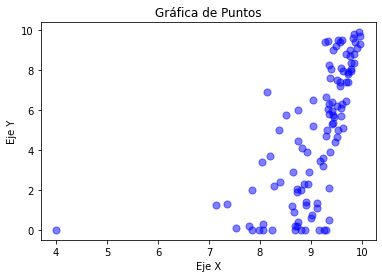

In [257]:
import matplotlib.pyplot as plt

dataset_model_87_P = dataset_model[dataset_model["aula_id"] == 141]
dataset_model_87_P = dataset_model_87_P[dataset_model["NOT_Presented_P"] == 0]
dataset_model_87_P = dataset_model_87_P[dataset_model["NOT_Presented_F"] == 0]
dataset_model_87_P["average_mark"] = dataset_model_87_P["average_mark"]*10

plt.scatter(dataset_model_87_P["average_mark"], dataset_model_87_P["F_Grade"], color='b', marker='o', s=50, alpha=0.5)

# Añadir títulos y etiquetas
plt.title('Gráfica de Puntos')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')

# Mostrar gráfica
plt.show()


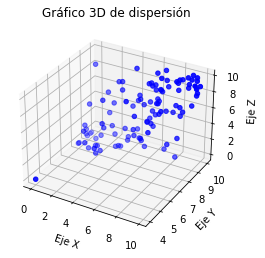

In [258]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Crear figura y ejes en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Gráfico de dispersión (scatter) en 3D
ax.scatter(dataset_model_87_P["P_Grade"], dataset_model_87_P["average_mark"], dataset_model_87_P["F_Grade"], color='blue', marker='o')

# Etiquetas de los ejes
ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_zlabel('Eje Z')
ax.set_title('Gráfico 3D de dispersión')

# Mostrar gráfico
plt.show()


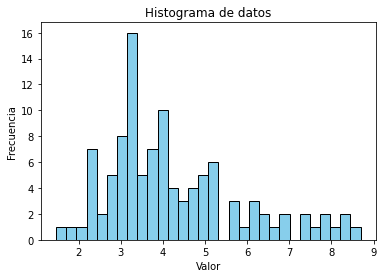

In [243]:
plt.hist(dataset_model_87_P["average_attempt_number"], bins=30, color='skyblue', edgecolor='black')

# Opciones de la gráfica
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma de datos')

# Mostrar la gráfica
plt.show()

In [236]:
dataset_model_87_P.head()

,userid,aula_id,average_attempt_number,average_mark,NOT_Presented_P,P_Grade,P_Grade_Date,NOT_Presented_F,F_Grade,F_Grade_Date,NOT_Presented_R,R_Grade,R_Grade_Date,rank_P,rank_F,rank_R
71192,1749,141,3.302817,8.929577,0,6.16,2023-11-10 14:00:00,0,3.9,2024-01-07 14:00:00,0,8.15,2024-02-06 14:00:00,41.0,51.0,5.0
71334,2273,141,5.021277,8.382979,0,5.09,2023-11-10 14:00:00,0,5.0,2024-01-07 14:00:00,1,NaN,2024-02-06 14:00:00,54.0,45.0,NaN
71381,1722,141,2.811189,9.604895,0,6.14,2023-11-10 14:00:00,0,9.5,2024-01-07 14:00:00,1,NaN,2024-02-06 14:00:00,42.0,5.0,NaN
71524,1723,141,1.774436,7.981203,0,0.00,2023-11-10 14:00:00,0,0.0,2024-01-07 14:00:00,0,1.00,2024-02-06 14:00:00,93.0,79.0,40.0
71657,1726,141,5.048780,8.963415,0,8.59,2023-11-10 14:00:00,0,2.9,2024-01-07 14:00:00,0,7.25,2024-02-06 14:00:00,14.0,57.0,11.0


In [259]:
# Importar librerías necesarias
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Crear datos de ejemplo
# Variables independientes (X) y dependientes (y)
X = dataset_model_87_P[["P_Grade", "average_mark"]]
y = dataset_model_87_P["F_Grade"]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Crear el modelo de regresión lineal
modelo = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
modelo.fit(X_train, y_train)

# Hacer predicciones en los datos de prueba
y_pred = modelo.predict(X_test)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error cuadrático medio:", mse)
print("Coeficiente de determinación (R^2):", r2)

# Mostrar coeficientes del modelo
print("Pendiente (coeficiente):", modelo.coef_)
print("Intercepto:", modelo.intercept_)


Error cuadrático medio: 11.32347662395987
Coeficiente de determinación (R^2): -0.05346002657417959
Pendiente (coeficiente): [0.40701035 2.60223152]
Intercepto: -21.005915744189092


AttributeError: 'Poly3DCollection' object has no attribute '_edgecolors2d'

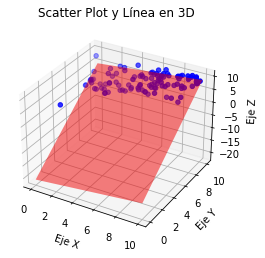

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Crear figura y ejes en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar el scatter plot en 3D
ax.scatter(dataset_model_87_P["P_Grade"], dataset_model_87_P["average_mark"], dataset_model_87_P["F_Grade"], color='blue', marker='o')

# Graficar la línea en 3D
a, b, c = modelo.coef_[0], modelo.coef_[1], modelo.intercept_  # Coeficientes para el plano
x_plane = np.linspace(0, 10, 10)  # Valores de x para el plano
y_plane = np.linspace(0, 10, 10)  # Valores de y para el plano
X_plane, Y_plane = np.meshgrid(x_plane, y_plane)
Z_plane = a * X_plane + b * Y_plane + c
ax.plot_surface(X_plane, Y_plane, Z_plane, color='red', alpha=0.5, rstride=100, cstride=100, edgecolor='none', label='Plano 3D')


# Etiquetas de los ejes
ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_zlabel('Eje Z')
ax.set_title('Scatter Plot y Línea en 3D')
ax.legend()
ax.set_zlim(0, None)

# Mostrar gráfico
plt.show()


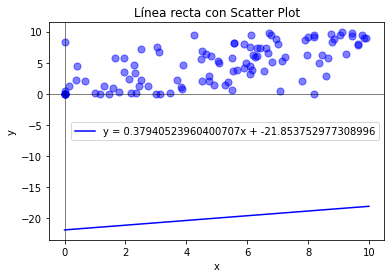

In [250]:
import matplotlib.pyplot as plt
import numpy as np

# Define la pendiente y el intercepto de la línea
m = modelo.coef_[0]  # pendiente
b = modelo.intercept_  # intercepto

# Rango de valores de x para la línea
x_line = np.linspace(0, 10, 100)
y_line = m * x_line + b


# Graficar la línea
plt.plot(x_line, y_line, color='blue', label=f'y = {m}x + {b}')

# Graficar el scatter plot
plt.scatter(dataset_model_87_P["P_Grade"], dataset_model_87_P["F_Grade"], color='b', marker='o', s=50, alpha=0.5)

# Opciones de la gráfica
plt.xlabel('x')
plt.ylabel('y')
plt.title('Línea recta con Scatter Plot')
plt.axhline(0, color='black', linewidth=0.5)  # Línea horizontal en y=0
plt.axvline(0, color='black', linewidth=0.5)  # Línea vertical en x=0
plt.legend()

# Mostrar la gráfica
plt.show()


In [276]:
dataset = pd.read_csv('./../../data/dataset.csv')
# Encontrar los usuarios que tienen exactamente 3 aulas diferentes
usuarios_con_3_aulas = dataset.groupby("userid")["aula_id"].nunique()
usuarios_con_3_aulas = usuarios_con_3_aulas[usuarios_con_3_aulas == 3].index

# Filtrar el DataFrame original para quedarse solo con estos usuarios
filtered_dataset = dataset[dataset["userid"].isin(usuarios_con_3_aulas)]
filtered_dataset[["userid", "aula_id"]].drop_duplicates()

C:\Users\anhin\AppData\Local\Temp\ipykernel_14340\4292352740.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('./../../data/dataset.csv')


,userid,aula_id
8749,1324,92
10053,343,92
15828,697,92
16428,294,92
17780,311,92
34839,343,143
37270,311,143
39813,1324,143
40816,294,143
46037,697,143


C:\Users\anhin\AppData\Local\Temp\ipykernel_14340\4129523683.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_model_P['P_Grade'] = dataset_model_P['P_Grade'].fillna(0)


TypeError: 'value' must be an instance of str or bytes, not a int

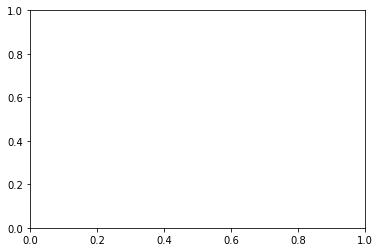

In [157]:
import matplotlib.pyplot as plt

dataset_model_P = dataset_model[dataset_model["P_Grade_Date"].notna()]
dataset_model_P['P_Grade'] = dataset_model_P['P_Grade'].fillna(0)
dataset_model_P = dataset_model_P[dataset_model_P['F_Grade'].notna()]

plt.scatter(dataset_model_P["P_Grade"], dataset_model_P["F_Grade"], color='b', marker='o', s=50, alpha=0.5)

# Añadir títulos y etiquetas
plt.title('Gráfica de Puntos')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')

# Mostrar gráfica
plt.show()